In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
def norm_data(data):
    
    # ensure multinomial coeffs for each year sum to 1
    norm = np.sum(data, axis=0)
    
    print('sum ok.')
    
    return data / norm

def likelihood(years, words, data):
    
    # get probability that all of words were picked given data at year, for each year
    
    print('norm ok.')
    
    # axes of data are (word, year). loop over years (to sacrifice speed for memory)
    multinom = np.zeros_like(data[0])
    
    print('zeros ok.')
    
    for i in range(data[0].size):
        
        multinom[i] = np.sum(words*np.log(data[:,i]))
    
    print('multinom ok.')
    
    # get normalization factor
    norm = np.sum(multinom*dx)
    print(norm)
    
    print('overall norm ok.')
    
    return multinom
    
def exp_prior(years):
    
    # an arbitrary exponential prior
    # to capture greater number of publications in recent years
    
    return np.log(np.exp(0.01*years)) / (np.sum(np.log(np.exp(0.01*years)))*dx)

def uni_prior(years):
    
    return np.zeros_like(years)

def posterior(years, words, data):
    
    # in log space
    post = likelihood(years, words, data) + uni_prior(years)
    
    norm = np.sum(post*dx)
    
    return post 

In [82]:
# get ngram word usage history data
# takes about a couple minutes with quad CPUs
filename = '../ngram_data/full_counts_1800.csv'

data = pd.read_csv(filename, delimiter=',', dtype=np.int32, header=None).values
data += 1
data.shape

(3194819, 209)

In [105]:
# read words in book from a file (processed by another script to save mem.)
wordfile = "../ngram_data/words.csv"

with open(wordfile, 'r') as f:
    words = np.genfromtxt(wordfile)
    
words.shape

(3194819,)

In [106]:
np.where(words != 0)[0].size

6

In [107]:
# generate posterior
dx = 1
years = np.arange(1800, 2008+1, dx)

post = posterior(years, words, norm_data(data))

sum ok.
norm ok.
zeros ok.
multinom ok.
-13886.583288697442
overall norm ok.


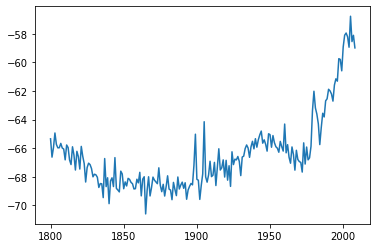

In [108]:
# make nice plots

plt.plot(years, post)
plt.show()

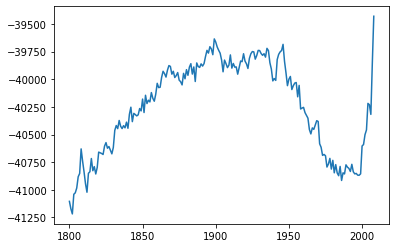

In [100]:
plt.plot(years, post)
plt.show()